## Exemplo de um Perceptron

In [ ]:
# Criando o dataset XOR

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

np.random.seed(1000)

nb_samples = 1000
nsb = int(nb_samples / 4)
X = np.zeros((nb_samples, 2))
Y = np.zeros((nb_samples, ))

X[0:nsb, :] = np.random.multivariate_normal([1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[0:nsb] = 0.0

X[nsb:(2 * nsb), :] = np.random.multivariate_normal([1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[nsb:(2 * nsb)] = 1.0

X[(2 * nsb):(3 * nsb), :] = np.random.multivariate_normal([-1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(2 * nsb):(3 * nsb)] = 0.0

X[(3 * nsb):, :] = np.random.multivariate_normal([-1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(3 * nsb):] = 1.0

ss = StandardScaler()
X = ss.fit_transform(X)

X, Y = shuffle(X, Y, random_state=1000)

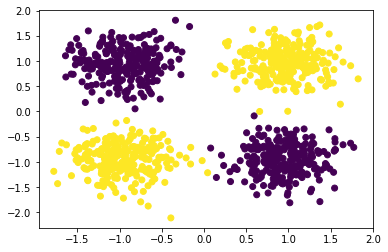

In [ ]:
#Exibindo dataset XOR
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

### Vamos verificar a acurácia usando um perceptron?

In [ ]:
import numpy as np

from multiprocessing import cpu_count

from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

pc = Perceptron(penalty='l2', alpha=0.1, max_iter=1000, n_jobs=cpu_count(), random_state=1000)
print(np.mean(cross_val_score(pc, X, Y, cv=10)))

0.5039999999999999


### Como o perceptron separa as regiões?

In [ ]:
#Funções para plotar a superficie (regiões)
#criadas pela separação pelo modelo criado

import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model(clf):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Superfície de Decisão')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

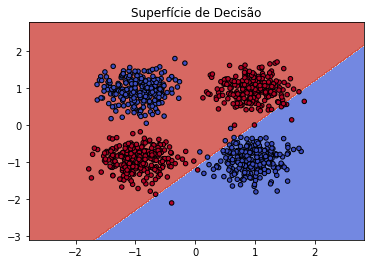

In [ ]:
pc.fit(X, Y)
plot_model(pc)

## MLP - Multilayer Perceptrons

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(4, input_dim=2)) # camada com 4 neuronios
model.add(Activation('tanh'))   #usando função de ativação tangente hiperbólica

model.add(Dense(2))  # camada com 2 neuronios
model.add(Activation('softmax'))   #usando função de ativação tangente hiperbólica

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#vamos separar o conjunto de treinamento e de testes
# 30% para testes, o restante para treinamento

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

In [ ]:
#treinamento da rede neural 
#usando 100 épocas
model.fit(X_train, 
          to_categorical(Y_train, num_classes=2), 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, num_classes=2)))

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 0.8221 - accuracy: 0.5014 - val_loss: 0.8316 - val_accuracy: 0.4767
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7885 - accuracy: 0.5114 - val_loss: 0.8023 - val_accuracy: 0.4767
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7602 - accuracy: 0.5129 - val_loss: 0.7774 - val_accuracy: 0.4767
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7360 - accuracy: 0.5214 - val_loss: 0.7566 - val_accuracy: 0.4800
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5157 - val_loss: 0.7397 - val_accuracy: 0.4867
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5200 - val_loss: 0.7251 - val_accuracy: 0.4767
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5200 - val_loss: 0.7140 - val_accuracy: 0.4800
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9914 - val_loss: 0.2147 - val_accuracy: 0.9867
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9914 - val_loss: 0.2075 - val_accuracy: 0.9867
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9929 - val_loss: 0.2005 - val_accuracy: 0.9900
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9929 - val_loss: 0.1941 - val_accuracy: 0.9933
Epoch 63/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.9929 - val_loss: 0.1871 - val_accuracy: 0.9933
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9929 - val_loss: 0.1802 - val_accuracy: 0.9933
Epoch 65/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1675 - accuracy: 0.9929 - val_loss: 0.1740 - val_accuracy: 0.9933
Epoch 

In [ ]:
#verificação(predição) usando a base de teste
Y_eval_mlp = np.argmax(model.predict(X_test), axis=1)

10/10 [==============================] - 0s 1ms/step


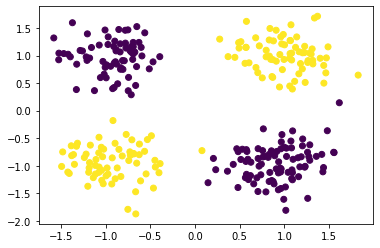

In [ ]:
#plotando os resultados
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp)
plt.show()

### Superficie usando o modelo atual com tanh

In [ ]:
import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000)
Ym = np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg = np.meshgrid(Xm, Ym)
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

31250/31250 [==============================] - 115s 4ms/step


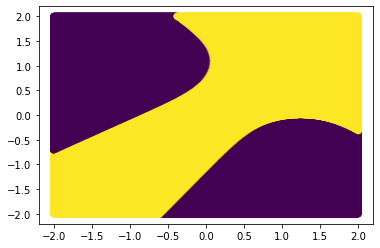

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
plt.show()

### E se criarmos um modelo usando função de ativação Relu?

In [ ]:
model = Sequential()

model.add(Dense(4, input_dim=2))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

model.fit(X_train, 
          to_categorical(Y_train, num_classes=2), 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, num_classes=2)))

Epoch 1/100
22/22 [==============================] - 2s 22ms/step - loss: 0.7156 - accuracy: 0.4557 - val_loss: 0.6516 - val_accuracy: 0.4900
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.4657 - val_loss: 0.6230 - val_accuracy: 0.5233
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.4714 - val_loss: 0.5986 - val_accuracy: 0.5100
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6151 - accuracy: 0.5171 - val_loss: 0.5785 - val_accuracy: 0.6233
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.6529 - val_loss: 0.5606 - val_accuracy: 0.6767
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5716 - accuracy: 0.6700 - val_loss: 0.5447 - val_accuracy: 0.6800
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.6886 - val_loss: 0.5305 - val_accuracy: 0.6833
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 0.9957 - val_loss: 0.1558 - val_accuracy: 0.9833
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1436 - accuracy: 0.9957 - val_loss: 0.1520 - val_accuracy: 0.9833
Epoch 61/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9957 - val_loss: 0.1487 - val_accuracy: 0.9867
Epoch 62/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1362 - accuracy: 0.9971 - val_loss: 0.1452 - val_accuracy: 0.9867
Epoch 63/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.9971 - val_loss: 0.1420 - val_accuracy: 0.9867
Epoch 64/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1294 - accuracy: 0.9971 - val_loss: 0.1389 - val_accuracy: 0.9867
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1262 - accuracy: 0.9971 - val_loss: 0.1357 - val_accuracy: 0.9867
Epoch 

In [ ]:
Y_eval_mlp = np.argmax(model.predict(X_test), axis=1)

10/10 [==============================] - 0s 3ms/step


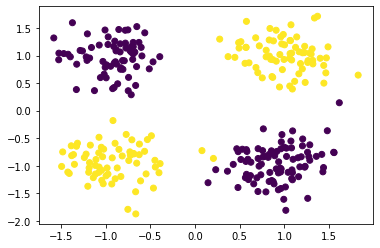

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp)
plt.show()

In [ ]:
import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000)
Ym = np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg = np.meshgrid(Xm, Ym)
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

31250/31250 [==============================] - 56s 2ms/step


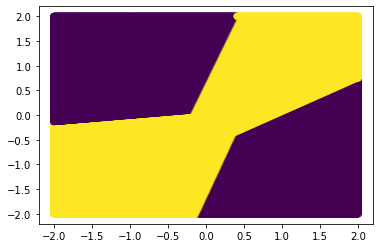

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
plt.show()